# Em construção!!

In [1]:
%matplotlib inline
%precision 4

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

plt.style.use('ggplot')

# Gerador de Números Aleatórios e Simulação de Monte Carlo
---

A técnica chamada *Monte Carlo* é, essencialmente, uma metodologia que utiliza médias amostrais para estimar médias populacionais, ou valor esperado.

Considerando uma variável aleatória (v.a.) $X$, temos que seu valor esperado $E(X)$ pode ser calculado como:

- caso discreto: $ E(X) = \sum_{i=1}^{\infty}x_i \ P(X=x_i)$
- caso contínuo: $ E(X) = \int_{-\infty}^{\infty}x \ f(x) \ dx$

Entretanto, a fdp não é conhecida a priori, e a média pode ser estimada como:

$$\bar{X} = \frac{1}{n}\sum_{i=1}^{n}X_i$$

O método é baseado em dois teoremas estatísticos: a *Lei Fraca dos Grandes Números* e o *Teorema Central do Limite*.

### Lei Fraca dos Grandes Números 
---

Seja $n$ o número de amostras aleatórias de uma população. A *Lei Fraca dos Grandes Números* assegura que, com $n \to \infty$, ou seja, um número grande de amostras, o valor da média amostral se iguala à média populacional, conquanto que a variância seja finita:

$$ \lim_{n \to \infty} P \bigg( \bigg| \frac{X_1+...+X_n}{n} - \mu \bigg| \ge \varepsilon \bigg) \to 0 $$

$$ \lim_{n \to \infty} \bigg( \frac{X_1+...+X_n}{n} \bigg) \to \mu \ \therefore \ \lim_{n \to \infty} \bar{X} \to \mu $$

Portanto eventualmente a soma normalizada do estimador se aproximará do valor esperado.


### Teorema Central do Limite
---

O *Teorema Central do Limite* assegura que, para $X_1, X_2, ..., X_n$ sendo uma sequência de v.a. i.i.d. retiradas de uma população com média $\mu$ e variância $\sigma^2$ (variância finita). A distribuição amostral de $\bar{X}$ aproxima-se, para $n \to \infty$ i.e. um número grande de amostras, de uma distribuição normal com média $\mu$ e variância $\sigma^2/n$. Isto é:

$$ P \big\{ \frac{X_1+X_2+...+X_n-n\mu}{\sigma \sqrt{n}} \le \alpha \big\} $$

$$ \to \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{a} e^{-x^2/2} dx, \ as \ n \to \infty $$

Pode-se definir também uma distribuição normalizada $Z$ ~ $\mathcal{N}(\mu, \sigma²)$, com $\mu=0$ e $\sigma²=1$:

$$ Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} $$


Referências: [[1]](https://www.sciencedirect.com/book/9780444515759/exploring-monte-carlo-methods), [[2]](https://github.com/renan2scarvalho/Estatistica-Basica/blob/main/Teorema%20Central%20do%20Limite.ipynb).

# Geradores de Números Aleatórios

### Amostragem pelo Método da Transformada Inversa
---

O método de Monte Carlo depende inerentemente dos conceitos de *amostragem* (mapear o valor de uma variável aleatória de sua distribuição de probabilidade) e *scoring* (estimativa do valor esperado, sendo que o o *score* geral é a média cumulativa $\bar{X}$ para $N$ scores em $N$ histórias).

A amostragem pela transformada inversa é um método para gerar números (pseudo)aleatórios de qualquer distribuição de probabilidade utilizando a transformada de sua distribuição acumulada (CDF) $F^{-1}(x)$, uma vez que existe uma correspondência entre duas CDFs, pois elas são funções crescentes monotônicas entre zero e um. Lembrando que uma CDF de uma v.a. $X$ é $F_X(x)=P(X \le x)$. Assim, assume-se que é possível gerar números (pseudo)aleatórios da uma v.a. $U$ uniformemente distribuiída entre [0,1] i.e. $U$ ~ Unif[0,1]. O algoritmo de amostragem é:

- Distribuições Contínuas:
  - gerar $U$ ~ Unif(0,1)
  - seja $X = F^{-1}(U)$

- Distribuições Discretas:
  - gerar $U$ ~ Unif(0,1)
  - determinar o índice $k$ de maneira que $\sum_{j=1}^{k-1}p_j \le U < \sum_{j=1}^{k}p_j$, e retorna $X=x_k$


Ref: [[3]](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html)







Considere realizar a amostragem de uma distribuição exponencial 
$$f(x) = 1 - exp(-x)$$

Temos nesse caso que a função inversa 

$$F^{-1}(u) = -log(1-u)$$

Uma vez que a quantidade aleatória $(1-u)$ é também distribuída de acordo com Unif(0,1), uma maneira computacionalmente mais eficiente de se calcular o resultado é

$$F^{-1}(u) = -log(u)$$

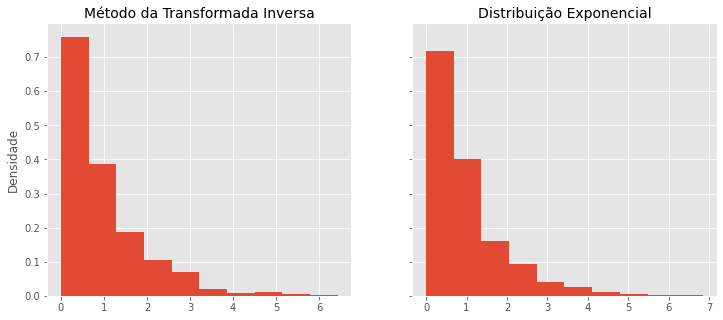

In [2]:
# passo 1
r = np.random.uniform(0, 1, 1000)
# passo 2
u = -np.log(r)

# distribuição exponencial
e = np.random.exponential(1, 1000)

# plot
figure, ax = plt.subplots(1, 2, figsize=(12,5), sharey=True)
ax[0].hist(u, density=True)
ax[0].set_ylabel('Densidade')
ax[0].set_title('Método da Transformada Inversa', fontsize=14)
ax[1].hist(e, density=True)
ax[1].set_title('Distribuição Exponencial', fontsize=14)
sns.despine()
plt.show()

#### Gerador de números aleatórios para distribuições arbitrárias

Suponha que tenhamos amostras aleatórias de uma distribuição de probabilidade desconhecida. Nesse caso, ainda podemos utilizar o método da transformada inversa para criar um gerador de números aleatórios através de uma amostra aleatória estimando a função inversa acumulada utilizando interpolação.

Ref: código em [[4]](https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html).



In [3]:
from scipy.interpolate import interp1d

def extrap1d(interpolator):
    """From StackOverflow http://bit.ly/1BjyRfk"""
    xs = interpolator.x
    ys = interpolator.y

    def pointwise(x):
        if x < xs[0]:
            return ys[0]+(x-xs[0])*(ys[1]-ys[0])/(xs[1]-xs[0])
        elif x > xs[-1]:
            return ys[-1]+(x-xs[-1])*(ys[-1]-ys[-2])/(xs[-1]-xs[-2])
        else:
            return interpolator(x)

    def ufunclike(xs):
        return np.array(list(map(pointwise, np.array(xs))))

    return ufunclike

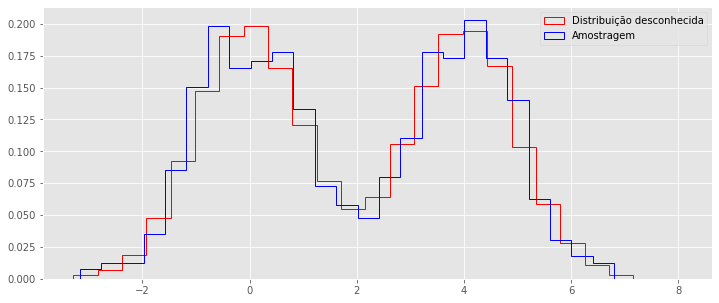

In [4]:
from statsmodels.distributions.empirical_distribution import ECDF

# Amostras aleatórias
x = np.concatenate([np.random.normal(0, 1, 10000),
                    np.random.normal(4, 1, 10000)])

ecdf = ECDF(x)
inv_cdf = extrap1d(interp1d(ecdf.y, ecdf.x,
                            bounds_error=False, assume_sorted=True))
r = np.random.uniform(0, 1, 1000)
ys = inv_cdf(r)

plt.figure(figsize=(12,5))
plt.hist(x, 25, histtype='step', color='red', density=True, linewidth=1, label='Distribuição desconhecida')
plt.hist(ys, 25, histtype='step', color='blue', density=True, linewidth=1, label='Amostragem')
plt.legend();

### Amostragem pelo Método de Aceitação-Rejeição
---

O método de aceitação-rejeição é dos algoritmos mais simples de amostragem, consistindo na geração de amostras aleatórias de uma distribuição de interesse $p(X)$ (*target distribution*) a partir da geração de candidatos de uma distribuição proposta $q(X)$ (*proposal distribution*). A distribuição prposta $q(X)$ deve envelopar a distribuição de interesse $p(X)$, ou seja, dado uma constante $c$, $cq(X) \ge p(X) \ \forall X$.

O algoritmo é o seguinte:

1. Simular $Z$ ~ $q(X) \to$ sem normalização
2. Calcular propabilidade da distribuição $u$ ~ Unif[$0, cq(Z)$]
3. Se $u \le p(Z)$ i.e. está abaixo da distribuição de interesse, aceitamos o candidato, retornando ao passo 1.

Ref [[5]](http://www.portalaction.com.br/simulacao-monte-carlo/metodo-de-aceitacao-rejeicao), [[6]](https://wiseodd.github.io/techblog/2015/10/21/rejection-sampling/)


In [5]:
def p(x):
  """Target distribution"""
  return stats.norm.pdf(x, loc=30, scale=10) + stats.norm.pdf(x, loc=80, scale=20)

def q(x):
  """Envelope"""
  return stats.norm.pdf(x, loc=50, scale=30)

In [6]:
%%time
x = np.arange(-50, 150)

c = max(p(x) / q(x))

s = []

for i in range(10000):
  z = np.random.normal(50, 30)
  u = np.random.uniform(0, c*q(z))

  if u <= p(z):
      s.append(z)

CPU times: user 3.64 s, sys: 153 ms, total: 3.79 s
Wall time: 3.64 s


O método de aceitação-rejeição possui algumas limitações. Dentre elas, devemos ter uma boa heurística na escolha da distribuição proposta $q(X)$, pois deve envelopar a distribuição de interesse $p(X)$ totalmente. Entretanto, dependendo da escolha de $q(X)$, os candidatos rejeitados devido ao espaço entre $cq(X)$ e $p(X)$ será grande, principalmente quando $p(X)$ possuir picos, como o caso da mistura de Gaussianas abaixo. Ademais, com o aumento da dimensionalidade, os candidatos rejeitados aumentam exponencialmente, e o tempo computacional para convergência também.

Ref: [[7]](https://www.youtube.com/watch?v=7Pha7POTJ5Y&list=PL05umP7R6ij1tHaOFY96m5uX3J21a6yNd&index=5)

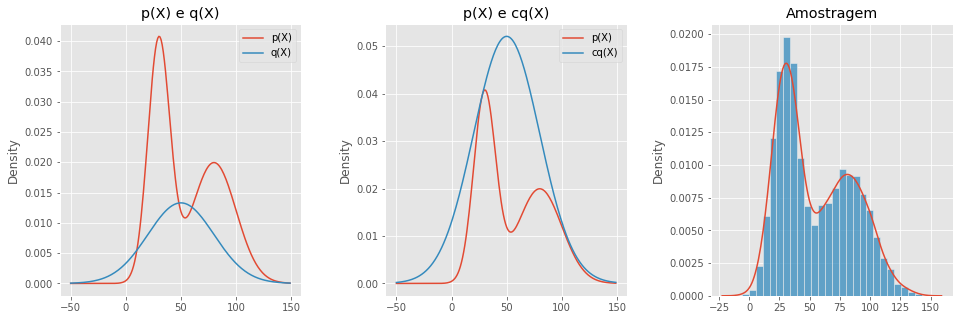

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
# ax[0]
ax[0].plot(x, p(x), label='p(X)')
ax[0].plot(x, q(x), label='q(X)')
ax[0].set(ylabel='Density', title='p(X) e q(X)')
ax[0].legend()
# ax[1]
ax[1].plot(x, p(x), label='p(X)')
ax[1].plot(x, c*q(x), label='cq(X)')
ax[1].set(ylabel='Density', title='p(X) e cq(X)')
ax[1].legend()
#ax[2]
sns.histplot(s, stat='density', ax=ax[2])
sns.kdeplot(s, ax=ax[2])
ax[2].set(title='Amostragem')
plt.subplots_adjust(wspace=0.35)
plt.show()

# Simulação de Monte Carlo


### Método de Integração de Monte Carlo
---
Uma das características do método de Monte Carlo é que ele é extremamente flexível e adaptável, e pode ser utilizado para resolver problemas complexos.

Suponha que desejamos calcular o valor de

$$\int_{a}^{b}f(x)dx $$

em uma região com volume $V$. Nese caso, podemos utilizar o método de integração de MC para estimar a integral estimando a fração de pontos aleatórios que se encontram abaixo de $f(x)$ multiplicado por $V$. Em um contexto estatístico, o valor esperado é

$$ E[h(X)] = \int_{X}h(x)f(x)dx \approx \bar{h_n} = \frac{1}{n} \sum_{i=1}^{n}h(x_i) $$

onde $x_i ~ f$ amostrado da distribuição $f$.

Ainda podemos determinar a variância da aproximação como 

$$ v_n = \frac{1}{n-1} \sum_{i=1}^n (h(x_i) - \bar{h_n})^2 $$

Ainda aplicando o Teorema Central do Limite, temos que 

$$ \frac{\bar{h_n} - E[h(X)]}{\sqrt{v_n}} \sim \mathcal{N}(0, 1) $$

A convergência do método de integração de MC é $O(n^{1/2})$ e *independente* da dimensionalidade, sendo normalmente mais vantajoso que a integração numérica para altas dimensionalidades uma vez que a integração numérica (quadratura) converge em $O(n^d)$.


Ref: [[4]](https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html)

Considere avaliar a integral

$$ E[h(X)] = \int_{X}h(x)f(x)dx $$

utilizando o método de integração Monte Carlo, temos a estimativa

$$ \bar{h_N} = \frac{1}{n} \sum_{i=1}^{n}h(x_i) $$

onde $x_i \ iid \ f(x)$

Suponha que a integral de interesse seja

$$ E_f[h(x)] = \int_{0}^{1} exp(\frac{-x²}{2}) dx  = 0.855624 \ (analiticamente) $$

Aplicando o método acima, temos que $h(x)$ e $f(x)$ são

$h(x) = exp(-x²/2)$

$f(x) = 1$ i.e. $x$ ~ Unif(0,1)

In [8]:
from sympy import symbols, integrate, exp

x = symbols('x')
expr = integrate(exp((-x**2)/2), (x,0,1))
sol = expr.evalf()
print('Solução analítica:', sol)

Solução analítica: 0.855624391892149


Valor analítico: 0.855624391892149, Simulação: 0.8553715731618432, erro: 0.000295478638408721



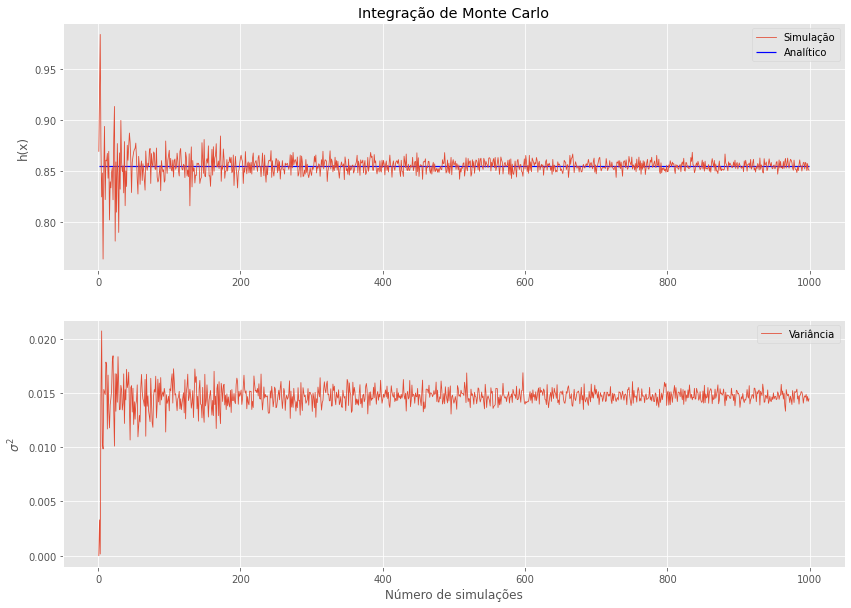

In [9]:
E = []
Var = []
Esim = []
Ns = 1000

for ns in range(1,Ns):

  aux = []
  for _ in range(ns):
    x = np.random.uniform()
    h = np.exp((-x**2)/2)
    aux.append(h) 

  E.append(np.mean(aux))
  Var.append(np.var(aux))
  Esim.append(ns)


print('Valor analítico: {}, Simulação: {}, erro: {}\n'.format(sol, np.mean(E), abs(sol-np.mean(E))/sol))

fig, ax = plt.subplots(2, 1, figsize=(14,10))
ax[0].plot(Esim, E, linewidth=0.8, label='Simulação')
ax[0].hlines(sol, np.min(Esim), np.max(Esim), color='b', linewidth=1.2, label='Analítico')
ax[0].set(ylabel = 'h(x)', title='Integração de Monte Carlo')
ax[0].legend()
ax[1].plot(Esim, Var, linewidth=0.8, label='Variância')
ax[1].set(xlabel='Número de simulações', ylabel = r'$\sigma^2$')
ax[1].legend()
plt.show()

Considere agora avaliar a integral

$$ E_{N(0,1)}[h(X)] = \int_{-\infty}^{\infty} x \frac{1}{2\pi} exp\left(\frac{-x²}{2}\right) dx  $$

Temos, portanto, que

$h(x) = x$

$f(x) = \phi(x)$ i.e. $x$ ~ $\mathcal{N}(0,1)$


Valor analítico: 0.0, Simulação: 0.0022145507576034782, delta: 0.0022145507576034782



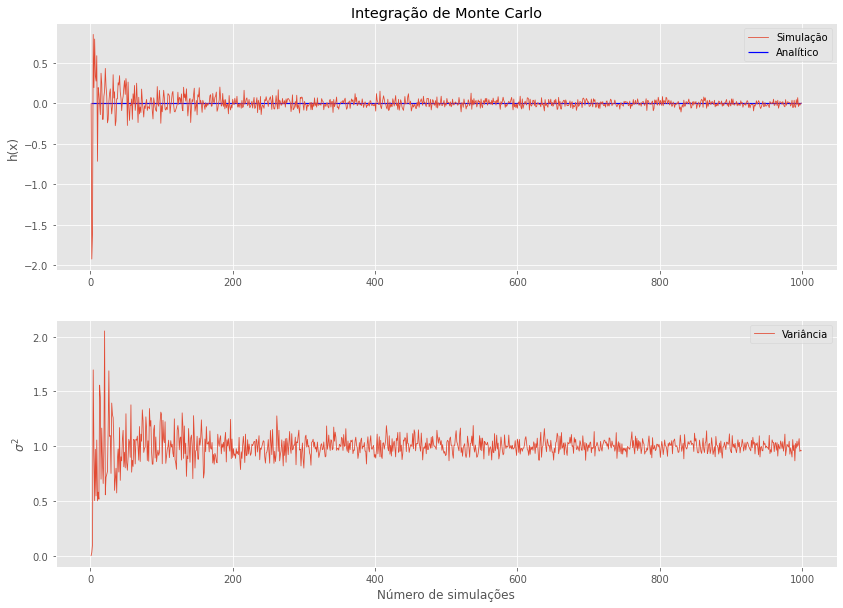

In [10]:
E = []
Var = []

for ns in range(1,Ns):

  aux = []
  for _ in range(ns):
    x = np.random.normal(0,1)
    aux.append(x)
  E.append(np.mean(aux))
  Var.append(np.var(aux))


print(f'Valor analítico: {0.}, Simulação: {np.mean(E)}, delta: {abs(0.-np.mean(E))}\n')

fig, ax = plt.subplots(2, 1, figsize=(14,10))
ax[0].plot(Esim, E, linewidth=0.8, label='Simulação')
ax[0].hlines(0., np.min(Esim), np.max(Esim), color='b', linewidth=1.2, label='Analítico')
ax[0].set(ylabel = 'h(x)', title='Integração de Monte Carlo')
ax[0].legend()
ax[1].plot(Esim, Var, linewidth=0.8, label='Variância')
ax[1].set(xlabel='Número de simulações', ylabel = r'$\sigma^2$')
ax[1].legend()
plt.show()

### Método de Amostragem por Importância
---

Outra vantagem da integração de MC é que quando o volume a ser integrado é concentrado em uma pequena região, podemos utilizar informação da distribuição para amostar determinadas subregiões com maior importância, enviesando a amostragem para eventos mais raros e.g. amostragem da calda de uma distribição, onde a probabilidade é muito inferior. Ademais, a amostragem por importância é utilizada para reduzir o erro e a variância das simulações.

Utilizando outra distribuição $g(x)$, chamada de função de importância (*importance function*), podemos reescrever o valor resperado como

$$ E_f[h(x)] \ = \  \int_X h(x) \frac{f(x)}{g(x)} g(x) dx \ = \ E_g\left[ \frac{h(X) f(X)}{g(X)} \right] $$

o que resulta em um novo estimador

$$ \bar{h_n} = \frac{1}{n} \sum_{i=1}^n \frac{f(x_i)}{g(x_i)} h(x_i) $$

Nesse caso, conceitualmente, a razão de verossimilhança $f(x_i)/g(x_i)$ nos dá um indicador de quão importante é a amostra $h(x_i)$ para estimar $\bar{h_n}$. É importante salientar que a amostragem é dependente da heurística da função de importância $g(x)$, sendo que duas escolhas comuns para $g(x)$ são:

- $g(x) = \frac{1}{a}f(x/a) \to$ escala
- $g(x) = f(x-a) \to$ translação

Outra vantagem da amostragem por importância é que é possível encontrar uma distribuição que venha a convergir mais rapidamente.

Ref: [[4]](https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html), [[5]](http://www.acme.byu.edu/wp-content/uploads/2016/12/Vol1B-MonteCarlo2-2017.pdf)

Como exemplo, suponha que queiramos estimar a probabilidade da calda da distribuição $\mathcal{N}(0,1)$ para $P(X>5)$. No caso do método de integração de MC, praticamente todas as amostras serão rejeitadas. Entretanto, aplicando-se uma distribuição exponencial truncada em 5 como função de importância $g(x)$:

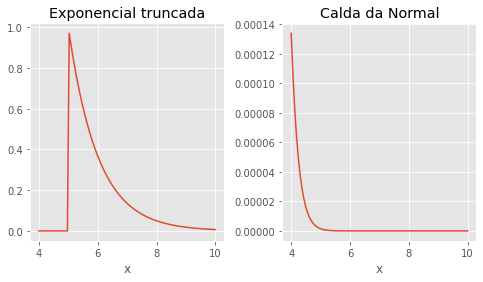

In [16]:
x = np.linspace(4, 10, 100)
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].plot(x, stats.expon(5).pdf(x))
ax[1].plot(x, stats.norm().pdf(x))
ax[0].set_xlabel("x")
ax[0].set_title("Exponencial truncada")
ax[1].set_xlabel("x")
ax[1].set_title("Calda da Normal")
plt.subplots_adjust(wspace=0.3)
plt.show()

No caso, temos 3 amostras a cada 10.000.000 para a distribuição normal com $P(X>5)$, sendo altamente ineficiente no caso apresentado:

In [15]:
%precision 7
h_true = 1 - stats.norm().cdf(5)
h_true

0.0000003